### 全体に共通する項目

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# wineデータセットの準備
from sklearn.datasets import load_wine

wine_bunch = load_wine()
wine_data = wine_bunch.data
wine_target = wine_bunch.target
wine_features = wine_bunch.feature_names

wine_data = pd.DataFrame(data=wine_data, columns=wine_features)
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [44]:
# データの分割
X = wine_data
y = wine_target
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# モデルの学習
rf_clf= RandomForestClassifier(random_state=0).fit(train_X, train_y)

import eli5
from eli5.sklearn import PermutationImportance

# Permutation Importanceの評価
perm = PermutationImportance(rf_clf, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names= val_X.columns.tolist())

Weight,Feature
0.1600 ± 0.0765,flavanoids
0.0356 ± 0.0453,alcohol
0.0311 ± 0.0218,hue
0.0267 ± 0.0333,magnesium
0.0178 ± 0.0435,proline
0.0178 ± 0.0178,color_intensity
0.0089 ± 0.0453,od280/od315_of_diluted_wines
0.0089 ± 0.0218,total_phenols
0.0044 ± 0.0178,ash
0.0044 ± 0.0178,malic_acid


In [45]:
wine_expl_df_perm = eli5.explain_weights_df(perm, feature_names= val_X.columns.tolist())
wine_expl_df_perm

,feature,weight,std
0,flavanoids,0.160000,0.038233
1,alcohol,0.035556,0.022662
2,hue,0.031111,0.010887
3,magnesium,0.026667,0.016630
4,proline,0.017778,0.021773
5,color_intensity,0.017778,0.008889
6,od280/od315_of_diluted_wines,0.008889,0.022662
7,total_phenols,0.008889,0.010887
8,ash,0.004444,0.008889
9,malic_acid,0.004444,0.008889


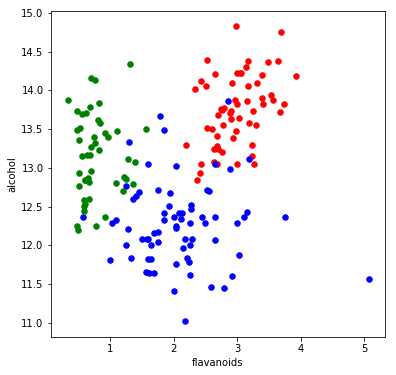

In [46]:
wine_df = wine_data.copy()
wine_df["label"] = y

fig, ax = plt.subplots(figsize=(6,6))
feature_1 = wine_expl_df_perm.feature.tolist()[0]
feature_2 = wine_expl_df_perm.feature.tolist()[1]

cls1 = wine_df.label == 0
cls2 = wine_df.label == 1
cls3 = wine_df.label == 2

wine_df[cls1].plot.scatter(x=feature_1, y=feature_2, ax=ax, c="r", s=30)
wine_df[cls2].plot.scatter(x=feature_1, y=feature_2, ax=ax, c="b", s=30)
wine_df[cls3].plot.scatter(x=feature_1, y=feature_2, ax=ax, c="g", s=30)
plt.show()

In [47]:
feature_importance_from_rf = rf_clf.feature_importances_

importance_df_from_rf = pd.DataFrame()
importance_df_from_rf["importance_from_rf"] = feature_importance_from_rf
importance_df_from_rf["feature"] = wine_features

importance_df_from_rf = importance_df_from_rf.sort_values(by="importance_from_rf", ascending=False)
importance_df_from_rf = importance_df_from_rf.reset_index().drop(["index"], axis=1)

importance_df_from_rf

,importance_from_rf,feature
0,0.243839,flavanoids
1,0.136041,color_intensity
2,0.133130,od280/od315_of_diluted_wines
3,0.122054,alcohol
4,0.084532,proline
5,0.074044,total_phenols
6,0.064493,hue
7,0.040925,alcalinity_of_ash
8,0.028004,malic_acid
9,0.022484,proanthocyanins


In [48]:
wine_expl_df_rf = eli5.explain_weights_df(rf_clf, feature_names= val_X.columns.tolist())
wine_expl_df_rf

,feature,weight,std
0,flavanoids,0.243839,0.185766
1,color_intensity,0.136041,0.151069
2,od280/od315_of_diluted_wines,0.133130,0.139259
3,alcohol,0.122054,0.155865
4,proline,0.084532,0.128864
5,total_phenols,0.074044,0.102884
6,hue,0.064493,0.115516
7,alcalinity_of_ash,0.040925,0.080627
8,malic_acid,0.028004,0.061014
9,proanthocyanins,0.022484,0.039180


順位の比較だけにする

In [49]:
perm_ranking = wine_expl_df_perm.copy()
perm_ranking = wine_expl_df_perm["feature"]
perm_ranking= perm_ranking.reset_index().rename(columns={"index": "perm_ranking"})
perm_ranking["perm_ranking"] = [i for i in range(1, len(perm_ranking)+1)]
perm_ranking

,perm_ranking,feature
0,1,flavanoids
1,2,alcohol
2,3,hue
3,4,magnesium
4,5,proline
5,6,color_intensity
6,7,od280/od315_of_diluted_wines
7,8,total_phenols
8,9,ash
9,10,malic_acid


In [50]:
rf_ranking = wine_expl_df_rf.copy()
rf_ranking = rf_ranking["feature"]
rf_ranking= rf_ranking.reset_index().rename(columns={"index": "rf_ranking"})
rf_ranking["rf_ranking"] = [i for i in range(1, len(rf_ranking)+1)]
rf_ranking

,rf_ranking,feature
0,1,flavanoids
1,2,color_intensity
2,3,od280/od315_of_diluted_wines
3,4,alcohol
4,5,proline
5,6,total_phenols
6,7,hue
7,8,alcalinity_of_ash
8,9,malic_acid
9,10,proanthocyanins


In [51]:
ranking_compare_df = perm_ranking.merge(rf_ranking, on="feature")
ranking_compare_df = ranking_compare_df[["feature", "perm_ranking", "rf_ranking"]]
ranking_compare_df

,feature,perm_ranking,rf_ranking
0,flavanoids,1,1
1,alcohol,2,4
2,hue,3,7
3,magnesium,4,13
4,proline,5,5
5,color_intensity,6,2
6,od280/od315_of_diluted_wines,7,3
7,total_phenols,8,6
8,ash,9,12
9,malic_acid,10,9


ここまで

### eli5
- 使用するのはeli5ライブラリのみ
- クラス分類に使える? 2クラスだけじゃなかったらどうなる?
- 特徴量を数値データに限定している
- my_modelを作成するとき、permutationImportanceを算出するときにそれぞれfitが必要
- とりあえず2クラス分類がわかりやすそう
    - 2クラス分類にはタイタニックを使ってみる
    - 他クラス問題にはwineデータセットがいいかな
- 回帰には使える?
    - 例題で扱われているタクシーのfare_amountは数値データだから多分使える

In [22]:
from sklearn.datasets import load_wine

wine_bunch = load_wine()
wine_data = wine_bunch.data
wine_target = wine_bunch.target
wine_features = wine_bunch.feature_names

In [42]:
len(wine_df)

178

In [23]:
wine_data = pd.DataFrame(data=wine_data, columns=wine_features)

In [24]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
# モデル作成
X = wine_data
y = wine_target
train_X, val_X, train_y, val_y = train_test_split(X, y)
rf_clf= RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [26]:
# valを使用してモデルの精度確認
rf_clf.score(val_X, val_y)

0.9555555555555556

In [27]:
import eli5
from eli5.sklearn import PermutationImportance

# PermutationImportanceの実行
perm = PermutationImportance(rf_clf, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names= val_X.columns.tolist())

Weight,Feature
0.0844 ± 0.0518,color_intensity
0.0667 ± 0.0398,proline
0.0444 ± 0.0795,flavanoids
0.0356 ± 0.0356,alcohol
0.0222 ± 0.0000,magnesium
0.0178 ± 0.0518,od280/od315_of_diluted_wines
0.0133 ± 0.0218,alcalinity_of_ash
0.0133 ± 0.0356,malic_acid
0.0089 ± 0.0218,hue
0 ± 0.0000,nonflavanoid_phenols


In [28]:
feature_importance_from_rf = rf_clf.feature_importances_

In [29]:
feature_importance_from_rf = rf_clf.feature_importances_
importance_df_from_rf = pd.DataFrame()
importance_df_from_rf["importance_from_rf"] = feature_importance_from_rf
importance_df_from_rf["feature"] = wine_features
importance_df_from_rf = feature_df.sort_values(by="importance_from_rf", ascending=False)
importance_df_from_rf = feature_df.reset_index()
importance_df_from_rf = feature_df.drop(["index"], axis=1)
importance_df_from_rf

,importance_from_rf,feature
0,0.232636,proline
1,0.155139,color_intensity
2,0.128775,flavanoids
3,0.112535,od280/od315_of_diluted_wines
4,0.110860,alcohol
5,0.059332,proanthocyanins
6,0.049459,hue
7,0.040870,malic_acid
8,0.035171,magnesium
9,0.032558,total_phenols


In [30]:
eli5.show_weights(rf_clf, feature_names= val_X.columns.tolist())

Weight,Feature
0.2326 ± 0.4017,proline
0.1551 ± 0.2942,color_intensity
0.1288 ± 0.2666,flavanoids
0.1125 ± 0.2704,od280/od315_of_diluted_wines
0.1109 ± 0.2614,alcohol
0.0593 ± 0.1337,proanthocyanins
0.0495 ± 0.1308,hue
0.0409 ± 0.1192,malic_acid
0.0352 ± 0.1360,magnesium
0.0326 ± 0.1587,total_phenols


In [37]:
wine_expl_df_rf = eli5.explain_weights_df(rf_clf, feature_names= val_X.columns.tolist())
wine_expl_df_perm = eli5.explain_weights_df(perm, feature_names= val_X.columns.tolist())

In [38]:
wine_expl_df

,feature,weight,std
0,proline,0.232636,0.200863
1,color_intensity,0.155139,0.147097
2,flavanoids,0.128775,0.133279
3,od280/od315_of_diluted_wines,0.112535,0.135206
4,alcohol,0.110860,0.130698
5,proanthocyanins,0.059332,0.066870
6,hue,0.049459,0.065415
7,malic_acid,0.040870,0.059624
8,magnesium,0.035171,0.067993
9,total_phenols,0.032558,0.079327


In [39]:
wine_expl_df_perm

,feature,weight,std
0,color_intensity,0.084444,0.025915
1,proline,0.066667,0.019876
2,flavanoids,0.044444,0.039752
3,alcohol,0.035556,0.017778
4,magnesium,0.022222,0.000000
5,od280/od315_of_diluted_wines,0.017778,0.025915
6,alcalinity_of_ash,0.013333,0.010887
7,malic_acid,0.013333,0.017778
8,hue,0.008889,0.010887
9,nonflavanoid_phenols,0.000000,0.000000


In [31]:
wine_df = wine_data.copy()
wine_df["label"] = y

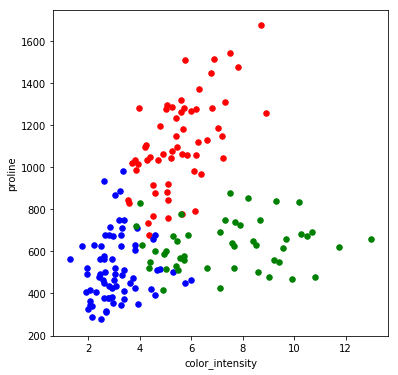

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
feature_1 = wine_expl_df_perm.feature.tolist()[0]
feature_2 = wine_expl_df_perm.feature.tolist()[1]

cls1 = wine_df.label == 0
cls2 = wine_df.label == 1
cls3 = wine_df.label == 2

wine_df[cls1].plot.scatter(x=feature_1, y=feature_2, ax=ax, c="r", s=30)
wine_df[cls2].plot.scatter(x=feature_1, y=feature_2, ax=ax, c="b", s=30)
wine_df[cls3].plot.scatter(x=feature_1, y=feature_2, ax=ax, c="g", s=30)
plt.show()

- 単純にモデルを渡すと、PermuationImportanceをかまさずに重み付けをした順番が出てくる。

In [18]:
import eli5
from eli5.sklearn import PermutationImportance

# PermutationImportanceの実行
perm = PermutationImportance(rf_clf, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names= val_X.columns.tolist())

Weight,Feature
0.0844 ± 0.0518,color_intensity
0.0667 ± 0.0398,proline
0.0444 ± 0.0795,flavanoids
0.0356 ± 0.0356,alcohol
0.0222 ± 0.0000,magnesium
0.0178 ± 0.0518,od280/od315_of_diluted_wines
0.0133 ± 0.0218,alcalinity_of_ash
0.0133 ± 0.0356,malic_acid
0.0089 ± 0.0218,hue
0 ± 0.0000,nonflavanoid_phenols


In [20]:
eli5.show_prediction(rf_clf, doc=val_X.iloc[0], feature_names= val_X.columns.tolist(), show_feature_values=True)

- ashがない…
- alcoholとflavanoidでも良さそう

In [ ]:
# 色分けして散布図をとってみる
plt.scatter()

In [80]:
predict_df = eli5.explain_prediction_df(my_model, doc=val_X.iloc[0], feature_names= val_X.columns.tolist())

- explain_prediction_dfsはdictで返してくる

In [81]:
predict_dfs = eli5.explain_prediction_dfs(my_model, doc=val_X.iloc[0], feature_names= val_X.columns.tolist())

In [82]:
predict_df

,target,feature,weight,value
0,0,<BIAS>,0.336842,1.00
1,0,color_intensity,0.167639,4.60
2,0,flavanoids,0.111743,2.65
3,0,proanthocyanins,0.045652,2.08
4,0,magnesium,0.031346,98.00
5,0,total_phenols,0.022407,2.42
6,0,ash,0.005556,2.56
7,0,nonflavanoid_phenols,0.004110,0.37
8,0,hue,0.000786,1.19
9,0,malic_acid,-0.003689,1.21


- PermutationImportanceをかましたあとのオブジェクトはサポートされていない。
- オブジェクトをwrapしていると思えばいいのかな。

In [83]:
explanation = eli5.explain_weights(perm, feature_names=val_X.columns.tolist())

In [84]:
type(explanation)

eli5.base.Explanation

### メモ
- eli5のshow_weightsを使うだけ。
- モデル自体の評価、という意味ではexplain_weightsをpermにかけた後に適用するのが適切。

## Regression

- みんな大好きbostonにするか

In [107]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

In [86]:
boston_dataset = load_boston()

In [95]:
boston_X = boston_dataset["data"]
boston_y = boston_dataset["target"]

In [92]:
boston_descr = boston_dataset.DESCR.split("\n")
boston_descr = [item.strip() for item in boston_descr]

In [102]:
boston_descr_sub = boston_descr[14:28]
boston_features = [item.split()[1] for item in boston_descr_sub]
boston_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [103]:
boston_df = pd.DataFrame(data=boston_X, columns=boston_features[:-1])

In [106]:
train_X, val_X, train_y, val_y = train_test_split(boston_df, boston_y)

In [108]:
rf_reg = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)

In [115]:
perm_rf_reg = PermutationImportance(rf_reg, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = boston_df.columns.tolist())

Weight,Feature
0.2489 ± 0.0711,AGE
0.0933 ± 0.0590,TAX
0.0889 ± 0.0889,LSTAT
0.0356 ± 0.0218,CRIM
0.0222 ± 0.0000,PTRATIO
0.0178 ± 0.0333,CHAS
0.0133 ± 0.0218,B
0.0133 ± 0.0218,NOX
0.0044 ± 0.0178,DIS
0.0044 ± 0.0178,ZN


In [118]:
eli5.show_prediction(rf_reg, doc=val_X.iloc[0], feature_names=boston_df.columns.tolist(), show_feature_values=True)

In [129]:
boston_prediction_df = eli5.explain_prediction_df(rf_reg, doc=val_X.iloc[0], feature_names=boston_df.columns.tolist())

In [130]:
boston_prediction_df

,target,feature,weight,value
0,y,<BIAS>,22.616025,1.00
1,y,TAX,1.456742,2.00
2,y,AGE,0.351340,2.27
3,y,PTRATIO,-0.036111,0.90
4,y,B,-0.335817,2.78
5,y,DIS,-0.373023,0.26
6,y,CRIM,-1.069994,12.52
7,y,NOX,-1.442167,88.00
8,y,RM,-1.549761,2.55
9,y,LSTAT,-7.947233,325.00


In [131]:
boston_predicton_df_dict = eli5.explain_prediction_dfs(rf_reg, doc=val_X.iloc[0], feature_names=boston_df.columns.tolist())

In [133]:
boston_predicton_df_dict['targets']

,target,feature,weight,value
0,y,<BIAS>,22.616025,1.00
1,y,TAX,1.456742,2.00
2,y,AGE,0.351340,2.27
3,y,PTRATIO,-0.036111,0.90
4,y,B,-0.335817,2.78
5,y,DIS,-0.373023,0.26
6,y,CRIM,-1.069994,12.52
7,y,NOX,-1.442167,88.00
8,y,RM,-1.549761,2.55
9,y,LSTAT,-7.947233,325.00


In [134]:
boston_expl_perm = eli5.explain_weights(perm, feature_names = boston_df.columns.tolist())

In [135]:
boston_expl_perm

Weight,Feature
0.1244 ± 0.0665,CRIM
0.0889 ± 0.0629,TAX
0.0800 ± 0.0603,LSTAT
0.0667 ± 0.0629,AGE
0.0222 ± 0.0281,ZN
0.0178 ± 0.0178,RAD
0.0133 ± 0.0356,B
0.0044 ± 0.0178,DIS
0 ± 0.0000,PTRATIO
0 ± 0.0000,RM


In [138]:
boston_expl_perm_html = eli5.format_as_html(boston_expl_perm)
boston_expl_perm_html

'\n    <style>\n    table.eli5-weights tr:hover {\n        filter: brightness(85%);\n    }\n</style>\n\n\n\n    \n        <p>Explained as: feature importances</p>\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n\n    \n\n    \n        \n        <pre>\nFeature importances, computed as a decrease in score when feature\nvalues are permuted (i.e. become noise). This is also known as \npermutation importance.\n\nIf feature importances are computed on the same data as used for training, \nthey don\'t reflect importance of features for generalization. Use a held-out\ndataset if you want generalization feature importances.\n</pre>\n    \n\n    \n\n    \n\n    \n\n    \n\n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n\n    \n\n    \n\n    \n\n    \n\n    \n\n    \n\n\n    \n\n    \n\n    \n\n    \n\n    \n        <table class="eli5-weights eli5-feature-importances" style="border-collapse: collapse; border: none; margin-top: 0em; table-layout: auto;">\n    <thead>\n    <tr style="border: no

In [139]:
boston_expl_perm_df = eli5.format_as_dataframe(boston_expl_perm)
boston_expl_perm_df

,feature,weight,std
0,CRIM,0.124444,0.033259
1,TAX,0.088889,0.031427
2,LSTAT,0.080000,0.030144
3,AGE,0.066667,0.031427
4,ZN,0.022222,0.014055
5,RAD,0.017778,0.008889
6,B,0.013333,0.017778
7,DIS,0.004444,0.008889
8,PTRATIO,0.000000,0.000000
9,RM,0.000000,0.000000


In [149]:
boston_expl_perm_dfs = eli5.format_as_dataframes(boston_expl_perm)
boston_expl_perm_dfs

{'feature_importances':     feature    weight       std
 0      CRIM  0.124444  0.033259
 1       TAX  0.088889  0.031427
 2     LSTAT  0.080000  0.030144
 3       AGE  0.066667  0.031427
 4        ZN  0.022222  0.014055
 5       RAD  0.017778  0.008889
 6         B  0.013333  0.017778
 7       DIS  0.004444  0.008889
 8   PTRATIO  0.000000  0.000000
 9        RM  0.000000  0.000000
 10      NOX  0.000000  0.000000
 11     CHAS  0.000000  0.000000
 12    INDUS  0.000000  0.000000}

In [150]:
boston_expl_perm_dict = eli5.format_as_dict(boston_expl_perm)
boston_expl_perm_dict

{'decision_tree': None,
 'description': "\nFeature importances, computed as a decrease in score when feature\nvalues are permuted (i.e. become noise). This is also known as \npermutation importance.\n\nIf feature importances are computed on the same data as used for training, \nthey don't reflect importance of features for generalization. Use a held-out\ndataset if you want generalization feature importances.\n",
 'error': None,
 'estimator': "PermutationImportance(cv='prefit',\n           estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=None, max_features='auto', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,\n            oob_score=False, random_state=0, verbose=0, warm_start=False),\n           n_iter=5, random_state=1, refit=True, scoring=None)",
 'feature_importa